# Unsupervised Learning
#### © Explore Data Science Academy

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

### Honour Code
We JS7, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

Import Libraries and Read In the Data
Do not modify or remove any of the code in these cells.

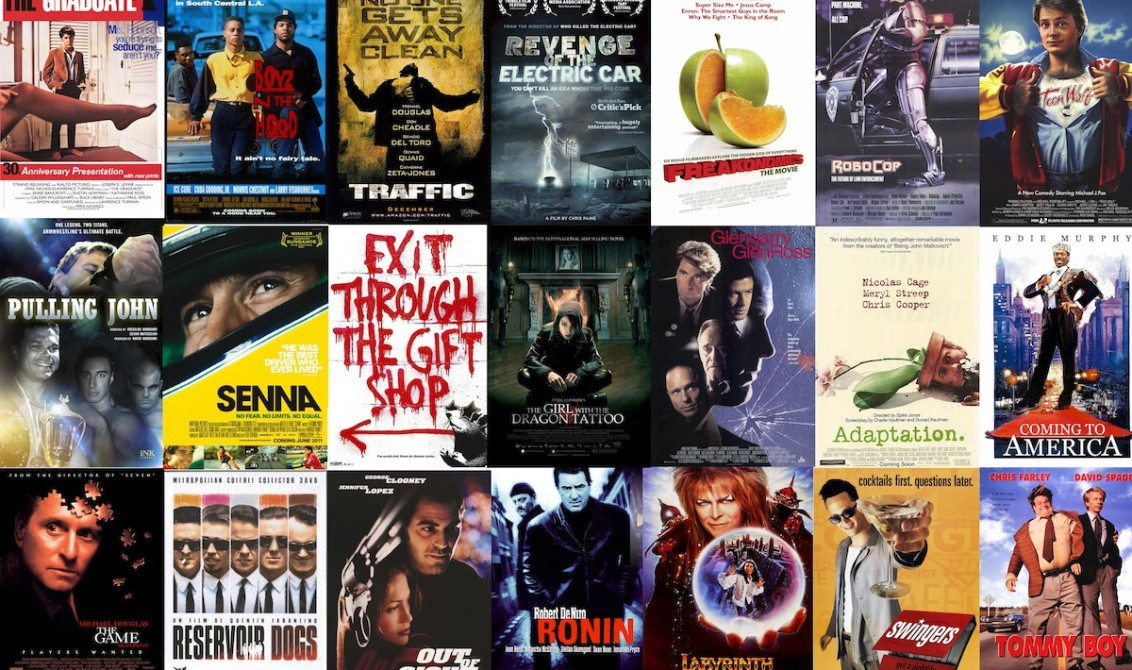

## Problem Statement

Everyone loves movies irrespective of age,gender,race,color,or geographical location. We all in a way are connected to each other via this amazing meduim. Media has value and with Value come responsibility. One such responsibity is that of guiding people towards selections they will love. Using someones past experience we can finetune a selection of media catored to their tatse. As we all know a happy customer is a loyal customer! ...............................

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. References</a>

## 1. Importing Packages

The goal of the imported packages is that of having the necessary to visualise and analyse the problem at hand...........

In [1]:
#data analysis import
import numpy as np 
import pandas as pd 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Visualizations libraries...
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#Natural Language Processing libraries....
from collections import defaultdict
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
import string
import plotly.figure_factory as ff
import random
import re
from wordcloud import WordCloud
from collections import Counter
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob

# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle
from collections import Counter

# Machine learning models
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)
from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity


# nltk for preprocessing of text data
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

![R.jpg](attachment:eda445a6-d2cb-4a45-918f-4a9b2746ef54.jpg)

## 2. Loading Data

The bellow data will be looked at in unique and exciting ways to show how one can gain insight on the data.

In [ ]:
# import dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_movies = pd.read_csv('movies.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')
df_imdb = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_score = pd.read_csv('genome_scores.csv')
sample_submission = pd.read_csv('sample_submission.csv')

## 3. Exploritory Data Analysis
This section of the journey will look at diving deeper into the data in order to understand and gain insight on the data that will be used to create and generate a movie recomender.

Bellow we see there are three columns that one can worlk on this being the timestamp etc..

In [ ]:
df_train.head() # viewing the first n rows

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
df_train.shape

(10000038, 4)

Below is a statistical analysis in which were look at how spread out the data is and how the data varies per row...

In [ ]:
df_train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [ ]:
df_train.isnull().sum() # Here we see that there are no empty data points which is good!

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

We now have the data that we will later use to see how well our models we will build fair against unkown information....

In [ ]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


Here we see we have title and type of movie each movie posseses 

In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Merging the dataset with that of the movies
df_train2 = pd.merge(df_train,df_movies,on='movieId')

# Viewing first 5 rows
df_train2.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [ ]:
# Merging the dataset with that of the imbd
df_train3 = pd.merge(df_train2,df_imdb, on="movieId")

# Viewing first 5 rows
df_train3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


Below we look at the title and rating of movies

In [ ]:
df_train3.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

title
Wrestling for Jesus: The Tale of T-Money (2011)    5.0
The... Beautiful Country (1977)                    5.0
Only Daughter (2013)                               5.0
Vasermil (2007)                                    5.0
Day the Universe Changed, The (1985)               5.0
Name: rating, dtype: float64

Next we look at how many time each movie was rated from highest to lowest

In [ ]:
df_train3.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: rating, dtype: int64

We then put them in tables to make it more easier to read!

In [ ]:
ratings=pd.DataFrame(df_train3.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.753731
$ (Dollars) (1971),2.875000
$5 a Day (2008),3.125000
$9.99 (2008),3.222222
$ellebrity (Sellebrity) (2012),2.250000


In [ ]:
ratings['number of ratings'] = pd.DataFrame(df_train3.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
"""Great Performances"" Cats (1998)",2.753731,67
$ (Dollars) (1971),2.875000,16
$5 a Day (2008),3.125000,20
$9.99 (2008),3.222222,27
$ellebrity (Sellebrity) (2012),2.250000,2


In [ ]:
ratings.sort_values('number of ratings', ascending=False).head()

,rating,number of ratings
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
Forrest Gump (1994),4.047216,32383
Pulp Fiction (1994),4.195097,31697
"Silence of the Lambs, The (1991)",4.144172,29444
"Matrix, The (1999)",4.154253,29014


In [ ]:
movie_ratings = pd.read_csv('train.csv')
movie_ratings.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


The goal is to look for duplicated rows of infomation or asw we like to call them repeated offenders!

In [ ]:
# check duplicates
dup_bool = df_test.duplicated(['userId', 'movieId'])

# display duplicates
print("Number of duplicate records:", sum(dup_bool))

Number of duplicate records: 0


Creating copies inorder to safegaurd the originals!

In [ ]:
# Create a copy
train_f = df_train.copy()

In [ ]:
df_test = df_test.copy()

## Scalling 

The goal of scaling is to reduce different forms of measurements to the same playing field. Instead of trying comparing kilometers with millimeters we recude all  to millimeters and compare.

### Unscaled

In [ ]:
cf.set_config_file(offline=True, world_readable=True, theme='ggplot')


In [ ]:
# using plotly to plot the boxplot
train_f[:1000].iplot(kind='box', title="Boxplots of Features (Unscaled)")
cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

In [ ]:
# using plotly to plot the boxplot
df_test[:1000].iplot(kind='box', title="Boxplots of Features (Unscaled)")


### Scaled

Here we see boxplots that are more easy on the eye and show to be easier to compare in their outlier and sckewneess towards a particular extreme!

In [ ]:
# create scaler object
scaler = StandardScaler()

# define scaled data frame variable

train_scaled = preprocessing.scale(train_f)
train_scaled = pd.DataFrame(train_scaled)
# plot boxplots using scaled data
train_scaled[:1000].iplot(kind='box', title="Boxplots of Features (Scaled)")

In [ ]:
# create scaler object
scaler = StandardScaler()

# define scaled data frame variable

test_scaled = preprocessing.scale(df_test)
test_scaled = pd.DataFrame(test_scaled)
# plot boxplots using scaled data
test_scaled[:1000].iplot(kind='box', title="Boxplots of Features (Scaled)")

The following bar graph looks at the distribution of movies and how many fall in each rating. Here we see that the level 4 rating is the most common rating.

Average rating in dataset: 3.5333951730983424


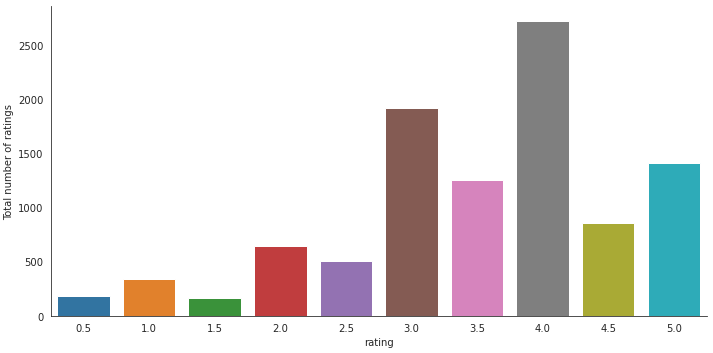

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=movie_ratings[:10000], aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(movie_ratings["rating"])}')

### Merging Data!!

In [ ]:
# Merge the ratings and movies
df_merge1 = train_f.merge(df_movies, on='movieId')
# View the first 5 rows
df_merge1.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [ ]:
# Merge the ratings and movies
df_merge1_test = df_test.merge(df_movies, on='movieId')
# View the first 5 rows
df_merge1_test.head()

,userId,movieId,title,genres
0,1,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
1,13,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
2,54,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
3,57,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
4,120,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi


In [ ]:
df_merge2 = df_merge1.merge(df_imdb, on="movieId")
# View first 5 rows
df_merge2.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [ ]:
df_merge2_test = df_merge1_test.merge(df_imdb, on="movieId")
# View first 5 rows
df_merge2_test.head()

,userId,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN
1,13,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN
2,54,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN
3,57,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN
4,120,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merging the merge data earlier on with the df_imbd
df_merge3 = df_merge2.merge(df_imdb, on="movieId" )
# View first 5 rows
df_merge3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast_x,director_x,runtime_x,budget_x,plot_keywords_x,title_cast_y,director_y,runtime_y,budget_y,plot_keywords_y
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [ ]:
# Merging the merge data earlier on with the df_imbd
df_merge3_test = df_merge2_test.merge(df_imdb, on="movieId" )
# View first 5 rows
df_merge3_test.head()

,userId,movieId,title,genres,title_cast_x,director_x,runtime_x,budget_x,plot_keywords_x,title_cast_y,director_y,runtime_y,budget_y,plot_keywords_y
0,1,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
major= df_merge3.drop_duplicates('movieId')
major.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast_x,director_x,runtime_x,budget_x,plot_keywords_x,title_cast_y,director_y,runtime_y,budget_y,plot_keywords_y
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4253,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
major_test = df_merge3_test.drop_duplicates('movieId')
major_test.head(2)

,userId,movieId,title,genres,title_cast_x,director_x,runtime_x,budget_x,plot_keywords_x,title_cast_y,director_y,runtime_y,budget_y,plot_keywords_y
0,1,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4658,1,4144,In the Mood For Love (Fa yeung nin wa) (2000),Drama|Romance,Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...,Kar-Wai Wong,98.0,NaN,adultery|loneliness|neighbor|infidelity,Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...,Kar-Wai Wong,98.0,NaN,adultery|loneliness|neighbor|infidelity


### Principal Componint Analysis (PCA)

PCA looks at creating existing clusters in the data, the goal is to look at data without an agenda and allow itself to be grouped baced on how close points are in relation to one another. The closer you are the stronger the conection, the more you are part of that group!

In [ ]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(train_f)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)


Another trick that PCA has it is it helps one learn how much of your data you actually need to predict for the future! Why use it all when you can affectively use less and get as good of results!!!

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance')

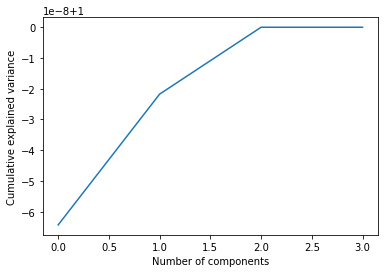

In [ ]:
# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

What we learn is that 2  of the columns and data in the dataset explain for the majority of the data trends and behaviour. This makes sence as there are not as many columns.

In [ ]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(test_scaled)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance')

array([[ 1.61090984,  0.76455666, -1.4866371 ],
       [-0.41761693, -1.04002594, -0.22950136],
       [-0.73016497, -1.95976845,  0.09282209],
       ...,
       [ 0.66467961, -1.37812249,  0.87320328],
       [ 0.44359078, -0.41799996, -0.24010424],
       [-1.48794115, -1.14462727,  0.61923322]])

88.0 % of variance explained by 3 components.


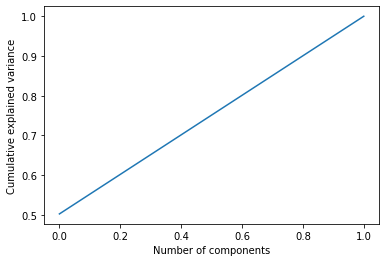

In [ ]:
# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
pca_85 = PCA(.85)
pca_85.fit_transform(train_scaled)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

For the test data, there is only two columns and as a result all of the data is needed to explain for the whole dataset.

In [ ]:
pca.explained_variance_ratio_[:3]
pca_85 = PCA(.85)
pca_85.fit_transform(test_scaled)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

array([0.50220069, 0.49779931])

array([[ 0.87794787, -1.57639237],
       [ 0.91643968, -1.53790056],
       [ 0.9457281 , -1.50861214],
       ...,
       [-1.52446222,  0.933174  ],
       [-1.5116677 ,  0.94596852],
       [-1.48524857,  0.97238765]])

100.0 % of variance explained by 2 components.


Now that we know that we can essentially drop one column the we decided to drop the timesamp. This is because how long a movie is does not nessacerally acount for a movies quality.

In [ ]:
labels = ['timestamp']
features = [col for col in df_train.columns if col not in labels]

## 2. Data Engineering

Now it is time to transform the data so that we can train a Machine Learning Model. The goal is to have it it in a standard and form that can be fed into the various data models.

In [ ]:
## 2. Data Engineering
X = df_train[features].drop(columns=['rating'])
y = df_train['rating']

Like before we now scale the data for models to traing at the same measuring frequency!

In [ ]:
# define scaled data frame variable
# create scaler object
scaler = StandardScaler()
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

We also transform the data into clusters to improve model ability.

In [ ]:
df_train3.tail(5)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
9633026,129077,66579,3.0,1446895942,"Lost, The (2009)",Thriller,Armand Assante|Dina Meyer|Lacey Chabert|Sergi ...,Dan Dworkin,95.0,NaN,NaN
9633027,78784,96316,3.5,1345995049,Aliisa (1970),Drama,Siiri Angerkoski|Selma Miettinen|Varma Lahtine...,Aulikki Oksanen,NaN,NaN,janitor|income|housing problem|social problem
9633028,80974,82732,3.0,1293164312,New York Confidential (1955),Crime|Drama|Film-Noir,NaN,NaN,NaN,NaN,NaN
9633029,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War,Christopher R Swanson|Daniel Asher|Brian Banca...,Nick Day,112.0,"$600,000",soldier|italy|partisan|fascist
9633030,72315,97148,3.0,1567584197,Elia Kazan: A Director's Journey (1995),Documentary,Elia Kazan|Eli Wallach,Richard Schickel,75.0,NaN,genius|artist|greek american|direction


In [ ]:
df_train3=df_train3.fillna(0)#converts NA to 0

In [ ]:
df_train3.tail()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
9633026,129077,66579,3.0,1446895942,"Lost, The (2009)",Thriller,Armand Assante|Dina Meyer|Lacey Chabert|Sergi ...,Dan Dworkin,95.0,0,0
9633027,78784,96316,3.5,1345995049,Aliisa (1970),Drama,Siiri Angerkoski|Selma Miettinen|Varma Lahtine...,Aulikki Oksanen,0.0,0,janitor|income|housing problem|social problem
9633028,80974,82732,3.0,1293164312,New York Confidential (1955),Crime|Drama|Film-Noir,0,0,0.0,0,0
9633029,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War,Christopher R Swanson|Daniel Asher|Brian Banca...,Nick Day,112.0,"$600,000",soldier|italy|partisan|fascist
9633030,72315,97148,3.0,1567584197,Elia Kazan: A Director's Journey (1995),Documentary,Elia Kazan|Eli Wallach,Richard Schickel,75.0,0,genius|artist|greek american|direction


## 3. Modeling

#### Linear Model 

A linear graph is a model that draws a straight line through data in a grap in order to provide a road map of how data changes over time or in relation to one another!

In [ ]:
lr = LinearRegression()
# train the model on training data
lr.fit(X_train, y_train)
# use the forest's predict method on the test data
predictions = lr.predict(X_test)

# calculate the absolute errors
errors = abs(predictions - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

LinearRegression()

Mean Absolute Error: 0.84


#### Decision Tree Regression

Are another model, that uses a complex of splits of data and decisions with the goal of finding a root pattern!

In [ ]:
# instantiate model with 1000 decision trees
dt = DecisionTreeRegressor(max_depth = 100)

In [ ]:
# train the model on training data
dt.fit(X_train, y_train)
# use the forest's predict method on the test data
pred_dt = dt.predict(X_test)

# calculate the absolute errors
errors = abs(pred_dt - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


DecisionTreeRegressor(max_depth=100)

Mean Absolute Error: 1.03


### K-means Clustering

This is the first clustering and unsupervised style of modeling used in this project. This looks at mean points in clusters and draws meaning form these points.

In [ ]:
km = KMeans(n_clusters = 3, random_state=42)
km.fit(X_train, y_train)

# obtain cluster memberships for each item in the data
y_preds_Kmeans = km.predict(X_test)

# calculate the absolute errors
errors = abs(y_preds_Kmeans - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

KMeans(n_clusters=3, random_state=42)

Mean Absolute Error: 2.84


### Gausian

In [ ]:
# Create the GMM instance
GMM = GaussianMixture(n_components=8, random_state=23)

# Use the object to fit the algorithm
GMM.fit(X_train, y_train)

# Predict in which cluster each datapoint falls
GMM_pred = GMM.predict(X_test)

GaussianMixture(n_components=8, random_state=23)

In [ ]:
# calculate the absolute errors
errors = abs(GMM_pred - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.29


So far with PCA a linear Regression does the best!

### Principal Component Analysis (PCA)

In [ ]:
### Clustering
# create PCA object with n_components set to 13
pca_reg = PCA(n_components=2)
# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca_reg.fit_transform(X_train)

### Linear Regression

In [ ]:
lr = LinearRegression()
# train the model on training data
lr.fit(X_train, y_train)
# use the forest's predict method on the test data
predictions = lr.predict(X_test)

# calculate the absolute errors
errors = abs(predictions - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

LinearRegression()

Mean Absolute Error: 0.84


### Decision Tree

In [ ]:
# instantiate model with 1000 decision trees
dt = DecisionTreeRegressor(max_depth = 100)

In [ ]:
# train the model on training data
dt.fit(X_train, y_train)
# use the forest's predict method on the test data
pred_dt = dt.predict(X_test)

# calculate the absolute errors
errors = abs(pred_dt - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


DecisionTreeRegressor(max_depth=100)

Mean Absolute Error: 1.33


### K-Means Clustering

In [ ]:
km = KMeans(n_clusters = 3, random_state=42)
km.fit(X_train, y_train)

# obtain cluster memberships for each item in the data
y_preds_Kmeans = km.predict(X_test)

# calculate the absolute errors
errors = abs(y_preds_Kmeans - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

KMeans(n_clusters=3, random_state=42)

Mean Absolute Error: 2.83


### Gausian

In [ ]:
# Create the GMM instance
GMM = GaussianMixture(n_components=8, random_state=23)

# Use the object to fit the algorithm
GMM.fit(X_train, y_train)

# Predict in which cluster each datapoint falls
GMM_pred = GMM.predict(X_test)

GaussianMixture(n_components=8, random_state=23)

In [ ]:
# calculate the absolute errors
errors = abs(GMM_pred - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 1.28


### Recommender Systems

#### Content-based Filtering 

In [ ]:
df_merge3.head(1)

,userId,movieId,rating,timestamp,title,genres,title_cast_x,director_x,runtime_x,budget_x,plot_keywords_x,title_cast_y,director_y,runtime_y,budget_y,plot_keywords_y
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [ ]:
df_movies['keyWords'] = df_movies['genres'].str.replace('|', ' ')

# Convienient indexes to map between book titles and indexes of 
# the df_movies dataframe
titles = df_movies['title']
indices = pd.Series(df_movies.index, index=df_movies['title'])

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(df_movies['keyWords'])

In [ ]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix[:12112], 
                                        tf_authTags_matrix[:12112])

MemoryError: Unable to allocate 509. MiB for an array with shape (66692884,) and data type float64

In [ ]:
def content_generate_top_N_recommendations(Movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[Movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    book_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[book_indices]

In [ ]:
content_generate_top_N_recommendations("In Bruges (2008)", N=10)

600                                           Fargo (1996)
1011                                        Freeway (1996)
3173     Man Bites Dog (C'est arrivé près de chez vous)...
4138                            Beautiful Creatures (2000)
5891                Confessions of a Dangerous Mind (2002)
6363                                 Hard Word, The (2002)
6582                                  Party Monster (2003)
9115         Freeway II: Confessions of a Trickbaby (1999)
10561                                    Cul-de-sac (1966)
Name: title, dtype: object

Linear regression under the MDS is still the best performing

## 4. References